### Project Title : Survey Dataset Analysis

#### Research Questions:
- Question 1: how many samples were collected on each day?
- Question 2: what proportion of the total respondents were aged less than 45?
- Question 3: create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+.
- Question 4: how many samples were collected for each age-group? Which age-group had the most samples?
- Question 5: what proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?
- Question 6: for each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.
- Question 7: In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.
- Question 8: create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.
- Question 9: repeat the above question with the cell values as the sum of “weight”.
- Question 10: create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.
- Question 11: create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.
- Question 12: join/merge the two dataframes from questions 10 and 11 with the common column as age_group.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Gathering

In [2]:
# load data into a dataframe and display the first 5 rows

df = pd.read_csv("dataset/survey_TI.csv")
df.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"€ 30,000 - € 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"€ 20,000 - € 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"€ 5,000 - € 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"€ 10,000 - € 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"€ 50,000 - € 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


<hr>

#### Question 1 
>how many samples were collected on each day?

In [3]:
# df.collection_date.unique()
# df.collection_date.nunique()
# df.collection_date.isnull().sum()

df.collection_date.value_counts()

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64

<hr>

#### Question 2
>what proportion of the total respondents were aged less than 45?

In [4]:
# df.age.isnull().sum()
# df.age.dtype

# df.age.unique()
df.age.nunique()

60

In [5]:
# change '24ko' to 24
df.age.replace({'24ko':'24'}, inplace = True)

In [6]:
# df.age.unique()
# df.age.value_counts()
df.age.nunique()

59

In [7]:
df.age.dtype

dtype('O')

In [8]:
# change datatype

df.age = df.age.astype(int)
df.age.dtype

dtype('int32')

In [9]:
# dataframe of participants less than 45 years
df_45 = df[df.age < 45]

In [10]:
# proportion of participants less than 45 years
prop_45 = (len(df_45)/len(df)) * 100

print(format(prop_45,".1f"))


93.2


The proportion of participants less than the age of 45 is **93.2%**

<hr>

#### Question 3
>create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+.

In [11]:
# create a copy of the original dataframe

ag_df = df.copy()
ag_df.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"€ 30,000 - € 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"€ 20,000 - € 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [12]:
ag_df.columns

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight'],
      dtype='object')

In [13]:
#ag_df.age.unique()

In [14]:
# create age_group column by binning the age column
# method 1

ag_df['age_group'] = pd.cut(x= ag_df['age'], 
                            bins=[18, 25, 40, 55, np.inf], 
                            labels=['18-25', '25-40', '40-55','55+'],
                            include_lowest=True, right= False)

In [15]:
# ag_df['age_group'] = ag_df['age'].apply(lambda age: '18-25' if age < 25 else '25-40' if age < 40 else '40-55' if age < 55 else '55+')


In [16]:
# method 3
# def bin_age(age):
#     if age <25:
#         return '18-25'
#     elif age <40:
#         return '25-40'
#     elif age < 55:
#         return '40-55'
#     else:
#         return '55+'
# ag_df['age_group'] = ag_df['age'].apply(bin_age)

In [17]:
move_col = ag_df.pop("age_group")

ag_df.insert(10, "age_group", move_col)

In [18]:
ag_df.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"€ 30,000 - € 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,25-40,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"€ 20,000 - € 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,25-40,Male,189,BC,0.603419


In [85]:
df.Past_Vote.value_counts()

BJP             2823
JD(U)           1374
RJD             1047
Did not vote     804
INC              213
NOTA             167
Others           132
LJP              125
HAM               50
RLSP              49
JAP(L)            42
Left Front        30
BSP                9
VIP                2
Name: Past_Vote, dtype: int64

In [86]:
df.Vote_Now.value_counts()

BJP           2367
RJD           1996
JD(U)          526
NOTA           458
JAP(L)         313
Plurals        217
INC            216
Undecided      164
RJJP           142
LJP            102
Others          87
RLSP            82
Left Front      79
AIMIM           37
VIP             28
AAP             27
BSP             15
HAM             11
Name: Vote_Now, dtype: int64

<hr>

#### Question 4
> how many samples were collected for each age-group? Which age-group had the most samples?

In [19]:
ag_df.age_group.value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: age_group, dtype: int64

<table>
    <tr><td>Age group </td><td>Participants</td></tr>
    <tr><td>18-25  </td><td>2094</td></tr>
    <tr><td>25-40  </td><td>3844</td></tr>
    <tr><td>40-55 </td><td>801</td></tr>
    <tr><td>55+ </td><td>128</td></tr>
</table>

> Age group 25-40 had the most samples with 3844 participants.

<hr>

#### Question 5 
>what proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [20]:
RJD_df = df[(df.Vote_Now == 'RJD') & (df.Past_Vote == 'RJD')]

In [21]:
# proportion
prop_RJD = (len(RJD_df)/len(df)) * 100

print(format(prop_RJD,".1f"))


11.8


The proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions is **11.8%**

<hr>

#### Question 6
> for each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [24]:
#df.collection_date.value_counts()
df.CM_satisfaction.unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [34]:
CM_fully_satisfied_df = df[df.CM_satisfaction == 'Fully Satisfied']


In [36]:
# count for fully satisfied for each day
CM_fully_satisfied_count = CM_fully_satisfied_df.collection_date.value_counts()
CM_fully_satisfied_count

5-24-2017    146
5-25-2017     95
5-28-2017     92
6-1-2017      75
5-29-2017     73
5-30-2017     65
5-31-2017     62
5-26-2017     59
5-27-2017     54
Name: collection_date, dtype: int64

In [42]:
# original df count for each day

total_count = df.collection_date.value_counts()
total_count

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64

In [41]:
CM_fully_satisfied_count/total_count * 100

5-24-2017     9.871535
5-25-2017     9.519038
5-26-2017     9.866221
5-27-2017     8.120301
5-28-2017    12.089356
5-29-2017    11.774194
5-30-2017    11.168385
5-31-2017    11.131059
6-1-2017     12.355848
Name: collection_date, dtype: float64

<hr>

**Question 7** 
>In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [81]:
#df.MLA_satisfaction.unique()

In [52]:
MLA_fully_dissatisfied_df = df[df.MLA_satisfaction == 'Fully Dissatisfied']
#MLA_fully_dissatisfied_df

In [48]:
# count for fully satisfied for each day
MLA_fully_dissatisfied_count = MLA_fully_dissatisfied_df.collection_date.value_counts()
MLA_fully_dissatisfied_count

5-24-2017    887
5-25-2017    630
5-28-2017    462
5-27-2017    403
6-1-2017     385
5-30-2017    361
5-26-2017    353
5-29-2017    350
5-31-2017    321
Name: collection_date, dtype: int64

In [49]:
# original df count for each day

#total_count = df.collection_date.value_counts()
total_count

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64

In [74]:
MLA_ds_prop = MLA_fully_dissatisfied_count/total_count * 100

In [75]:
type(MLA_ds_prop)

pandas.core.series.Series

In [76]:
# convert the series to dataframe

MLA_fully_dissatisfied_prop = pd.DataFrame({'Date': MLA_ds_prop.index, 'Count': MLA_ds_prop.values})
MLA_fully_dissatisfied_prop

,Date,Count
0,5-24-2017,59.972955
1,5-25-2017,63.126253
2,5-26-2017,59.030100
3,5-27-2017,60.601504
4,5-28-2017,60.709593
5,5-29-2017,56.451613
6,5-30-2017,62.027491
7,5-31-2017,57.630162
8,6-1-2017,63.426689


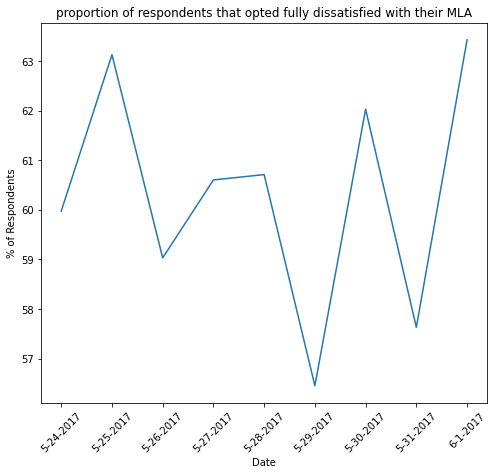

In [80]:
# line plot 

plt.figure(figsize =(8, 7))
plt.plot(MLA_fully_dissatisfied_prop.Date, MLA_fully_dissatisfied_prop.Count)
plt.title('proportion of respondents that opted fully dissatisfied with their MLA')
plt.xlabel('Date')
plt.ylabel('% of Respondents')
plt.xticks(rotation=45)
plt.show()

<hr> 

#### Question 8
>create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [91]:
# create pivot table

pivot = df.pivot_table(index='Past_Vote', values ='Vote_Now', aggfunc='count')
pivot

,Vote_Now
Past_Vote,
BJP,2823
BSP,9
Did not vote,804
HAM,50
INC,213
JAP(L),42
JD(U),1374
LJP,125
Left Front,30
